In [1]:
import pandas as pd

df= pd.read_csv('unicorn_startup_companies.csv')

df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$66,7/3/2018,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1221 non-null   int64 
 1   Company           1221 non-null   object
 2   Valuation ($B)    1221 non-null   object
 3   Date Joined       1221 non-null   object
 4   Country           1221 non-null   object
 5   City              1203 non-null   object
 6   Industry          1221 non-null   object
 7   Select Investors  1219 non-null   object
dtypes: int64(1), object(7)
memory usage: 76.4+ KB


In [3]:
df['Valuation'] = [float(val.replace('$','')) for val in df['Valuation ($B)']]
del df['Valuation ($B)']
df.head()

,Unnamed: 0,Company,Date Joined,Country,City,Industry,Select Investors,Valuation
0,0,ByteDance,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S...",225.0
1,1,SpaceX,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen...",137.0
2,2,SHEIN,7/3/2018,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China...",66.0
3,3,Stripe,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG",50.0
4,4,Canva,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0


In [4]:
df['Year'] = df['Date Joined'].apply(lambda x:x[-4:])


In [5]:
df.isnull().sum()

Unnamed: 0           0
Company              0
Date Joined          0
Country              0
City                18
Industry             0
Select Investors     2
Valuation            0
Year                 0
dtype: int64

In [6]:
df['City']= df.apply(lambda row: row['Country'] if pd.isnull(row['City']) else row['City'],axis=1)
missing=df.isnull().sum()
print(missing)

Unnamed: 0          0
Company             0
Date Joined         0
Country             0
City                0
Industry            0
Select Investors    2
Valuation           0
Year                0
dtype: int64


In [7]:
count_of_country = df['Country'].value_counts().reset_index()
count_of_country.columns = ['Country','Counts']
print(count_of_country)

                 Country  Counts
0          United States     656
1                  China     173
2                  India      70
3         United Kingdom      52
4                Germany      30
5                 France      25
6                 Israel      24
7                 Canada      21
8                 Brazil      16
9            South Korea      14
10             Singapore      14
11             Australia       8
12             Indonesia       8
13                Mexico       8
14                 Japan       7
15           Netherlands       7
16                Sweden       7
17             Hong Kong       7
18           Switzerland       6
19               Ireland       6
20                 Spain       5
21               Finland       4
22                Norway       4
23              Thailand       3
24                Turkey       3
25              Colombia       3
26               Belgium       3
27  United Arab Emirates       3
28                 Chile       2
29        

In [10]:
import plotly.express as px
fig = px.choropleth(
    count_of_country,
    locations='Country',
    locationmode = 'country names',
    color='Counts',
    range_color=(0,12)

)

fig.show()

In [ ]:
Count_of_Indusrty = df['Industry'].value_counts().reset_index()
Count_of_Indusrty.columns = ['Industry','Count']
print(Count_of_Indusrty)

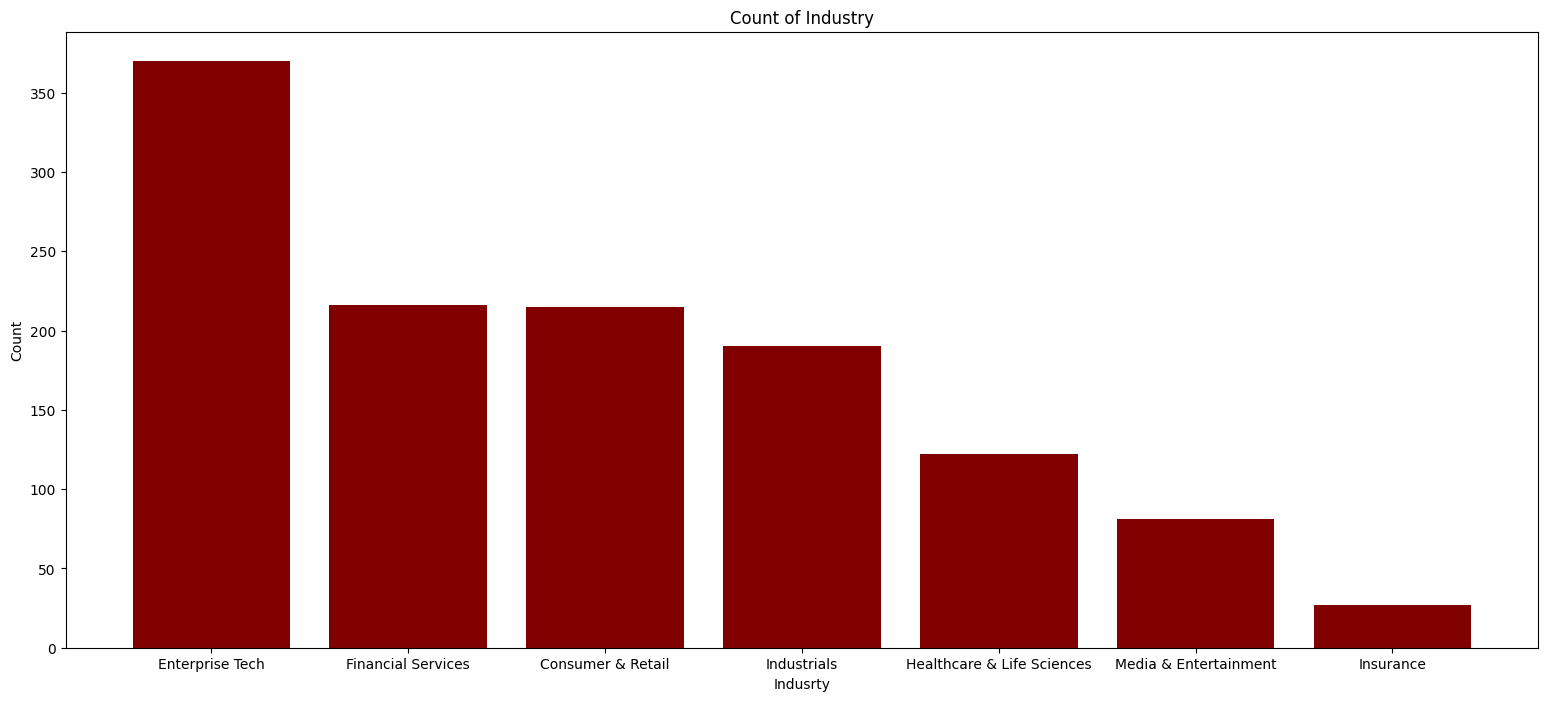

In [12]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = plt.figure(figsize=(19,8))
x=Count_of_Indusrty['Industry']
y=Count_of_Indusrty['Count']
plt.bar(x,y,color='maroon')

plt.xlabel('Indusrty')
plt.ylabel('Count')
plt.title('Count of Industry')
plt.show()

In [9]:
import folium

In [13]:
df.sort_values(['Valuation'],ascending=False,inplace=True)
df.head(12)

,Unnamed: 0,Company,Date Joined,Country,City,Industry,Select Investors,Valuation,Year
0,0,ByteDance,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S...",225.0,2017
1,1,SpaceX,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen...",137.0,2012
2,2,SHEIN,7/3/2018,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China...",66.0,2018
3,3,Stripe,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG",50.0,2014
4,4,Canva,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,2018
5,5,Revolut,4/26/2018,United Kingdom,London,Financial Services,"Index Ventures, DST Global, Ribbit Capital",33.0,2018
6,6,Epic Games,10/26/2018,United States,Cary,Media & Entertainment,"Tencent Holdings, KKR, Smash Ventures",31.5,2018
7,7,Databricks,2/5/2019,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, New Enterprise Associates...",31.0,2019
8,8,Fanatics,6/6/2012,United States,Jacksonville,Consumer & Retail,"SoftBank Group, Andreessen Horowitz, Temasek H...",31.0,2012
9,9,OpenAI,7/22/2019,United States,San Francisco,Enterprise Tech,Khosla Ventures,29.0,2019


In [14]:
top10=df[df['Valuation']>20]

print(top10)

    Unnamed: 0     Company Date Joined         Country           City  \
0            0   ByteDance    4/7/2017           China        Beijing   
1            1      SpaceX   12/1/2012   United States      Hawthorne   
2            2       SHEIN    7/3/2018           China       Shenzhen   
3            3      Stripe   1/23/2014   United States  San Francisco   
4            4       Canva    1/8/2018       Australia    Surry Hills   
5            5     Revolut   4/26/2018  United Kingdom         London   
6            6  Epic Games  10/26/2018   United States           Cary   
7            7  Databricks    2/5/2019   United States  San Francisco   
8            8    Fanatics    6/6/2012   United States   Jacksonville   
9            9      OpenAI   7/22/2019   United States  San Francisco   
10          10       Chime    3/5/2019   United States  San Francisco   

                 Industry                                   Select Investors  \
0   Media & Entertainment  Sequoia Capital 

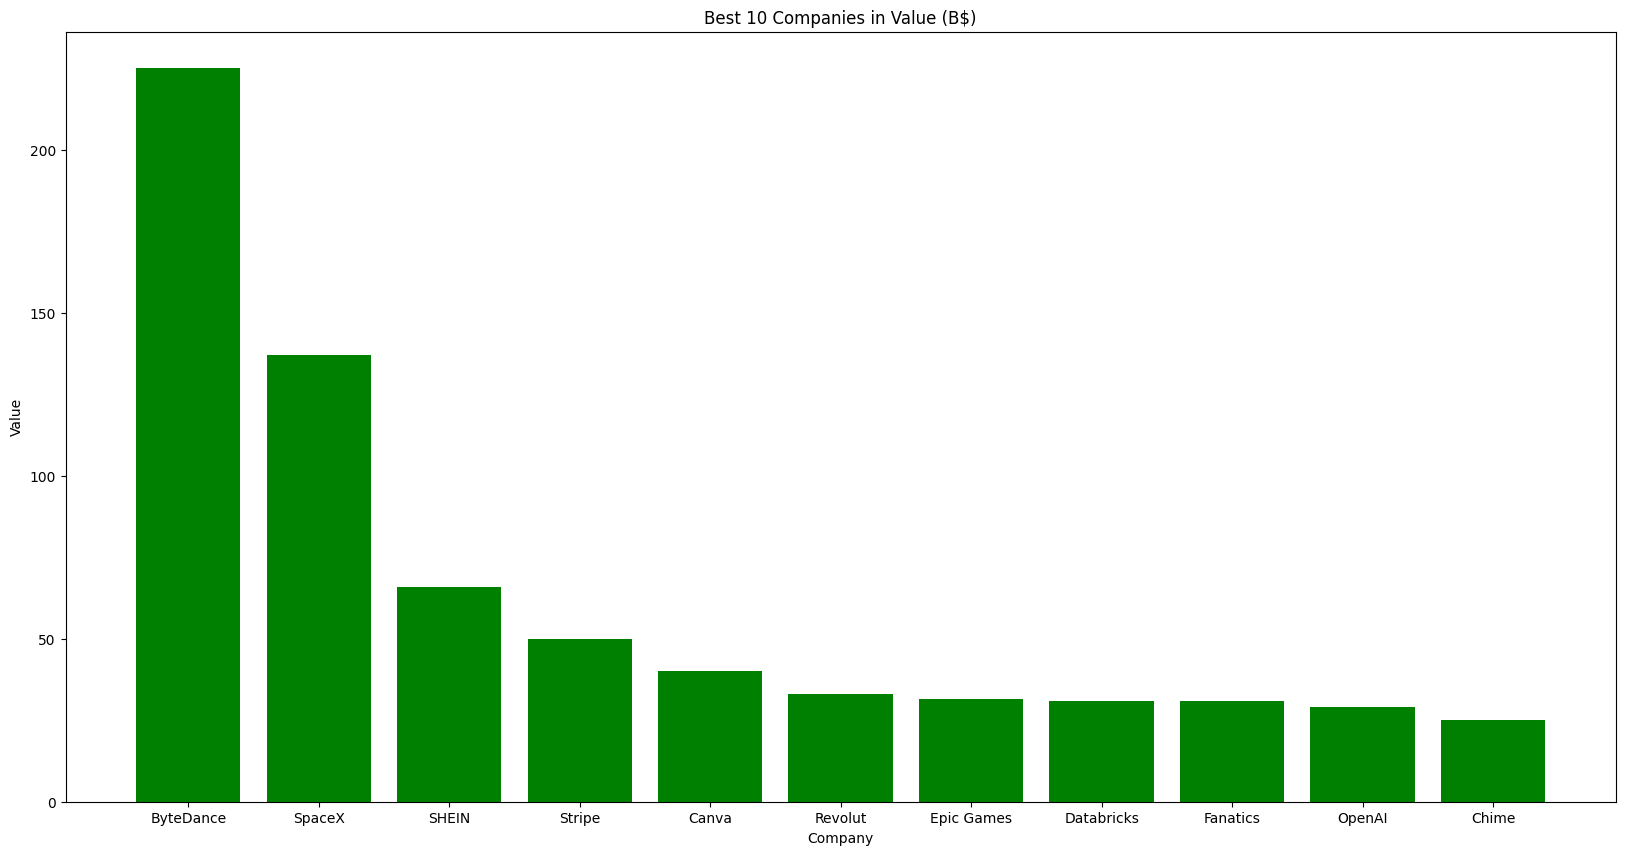

In [15]:
x = top10['Company']
y = top10['Valuation']
plt.figure(figsize=(20,10))
plt.bar(x,y,color='green')
plt.xlabel('Company')
plt.ylabel('Value')
plt.title('Best 10 Companies in Value (B$)')
plt.show()

In [16]:
Val_Industries = df.groupby(['Industry','Valuation'],as_index=False)['Company'].nunique()
Val_Industries= Val_Industries.sort_values(by=['Valuation'],ascending=False)
print(Val_Industries)

                  Industry  Valuation  Company
458  Media & Entertainment      225.0        1
398            Industrials      137.0        1
70       Consumer & Retail       66.0        1
256     Financial Services       50.0        1
170        Enterprise Tech       40.0        1
..                     ...        ...      ...
318            Industrials        1.0       40
399              Insurance        1.0        4
416  Media & Entertainment        1.0       16
171     Financial Services        1.0       46
0        Consumer & Retail        1.0       58

[459 rows x 3 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

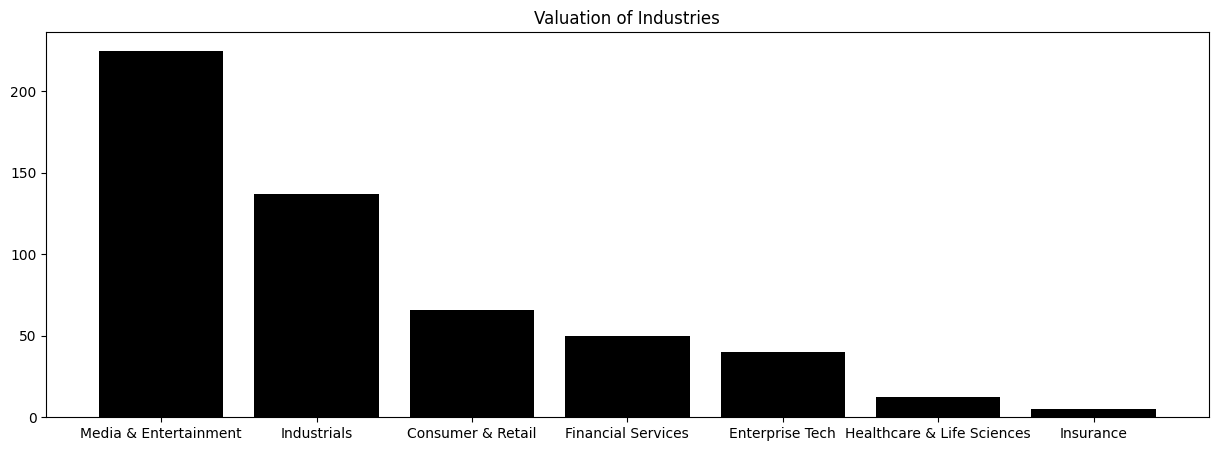

In [17]:
fig = plt.figure(figsize=(15,5))
x= Val_Industries['Industry']
y= Val_Industries['Valuation']
plt.bar(x,y,color='black')
plt.title('Valuation of Industries')
plt.show

In [44]:
company_by_year = df.groupby(['Year','Country'],as_index=False)['Industry'].nunique()
company_by_year = company_by_year.rename(columns={'Industry' :'Count Of Industry'})
company_by_year = company_by_year.sort_values(ascending=False,by=['Year'])
print(company_by_year)

     Year        Country  Count Of Industry
164  2023  United States                  5
159  2023      Indonesia                  1
155  2023         Canada                  1
157  2023          Egypt                  1
158  2023        Germany                  2
..    ...            ...                ...
4    2013  United States                  2
2    2012      Hong Kong                  1
3    2012  United States                  3
1    2011         Sweden                  1
0    2007         France                  1

[165 rows x 3 columns]


In [48]:
for i in company_by_year['Year'].unique():
    data = company_by_year[company_by_year['Year'] == i]
    fig = px.bar(data,x='Country',y='Count Of Industry'  , title =f'Count of Company by {i}')
    fig.show()